<a href="https://colab.research.google.com/github/MaksymZakharchenko/PhoneParty/blob/main/Rdiawow_zadanie1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Najpierw import większości potrzebnych w dalszej części notatnika modułów

# Standardowe (wbudowane) moduły j. Python:
from collections import defaultdict
from itertools import combinations
import subprocess

# matplotlib -- popularna bibl. do wykresów:
import matplotlib.patches as patches
import matplotlib as mpl
from matplotlib import pyplot as plt

# numpy -- bibl. do obliczeń numerycznych
import numpy as np
import pandas as pd   # do obróbki i analizy danych

# sklearn -- pakiet algorytów dot. sztucznej inteligencji
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay,\
                            classification_report, roc_auc_score

# IPython -- dotyczy funkcjonalności notatnika
from IPython.display import Image, display

In [15]:
def show_decision_tree(dec_tree,
                       out_file_prefix='tree',
                       feature_names=None,
                       class_names=None, width=None):
    # Tworzymy plik w formacie *.DOT z grafem odpowiadającym drzewu:
    export_graphviz(
        dec_tree,   # klasyfikator
        out_file=f'{out_file_prefix}.dot',
        feature_names=feature_names,
        class_names=class_names,
        rounded=True, filled=True  # Styl węzłów
    )
    
    # Uruchamiamy narzędzie Graphviz (polecenie dot) i generujemy plik PNG:
    subprocess.run(f'dot -Tpng {out_file_prefix}.dot -o {out_file_prefix}.png'.split(' '))
    
    display(Image(filename=f'{out_file_prefix}.png', width=width))

### **Zadanie 1 -- półksiężyce**

Proszę wytrenować klasyfikator drzewiasty dla danych "półksiężycowych" pokazanych poniżej. Proszę sprawdzić jak zmienia się jakość klasyfikacji w zależności o wart. parametru max_depth. Proszę pamiętać o podziale na zbiór treningowy oraz testowy.

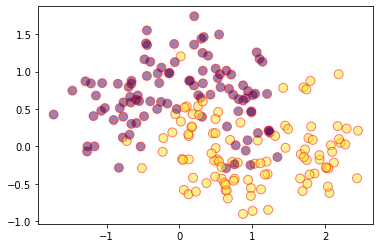

In [2]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.3, random_state=42)

show_plot = True

if show_plot:
  plt.scatter(X[:, 0],   # pierwsza cecha
              X[:, 1],   # druga cecha
              c=y,       # kolor wg etykiety
              edgecolors="red", alpha=0.5, s=80)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

f'Rozmiar zb. treningowego: {len(X_train)}, rozmiar zb. testowego: {len(X_test)}'

'Rozmiar zb. treningowego: 140, rozmiar zb. testowego: 60'

In [8]:
max_accuracy = -100
max_index = 0
for d in range(1, 10):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if (accuracy_score(y_test, y_pred) * 100)  > max_accuracy:
      max_accuracy = accuracy_score(y_test, y_pred) * 100
      max_index = d
    print(f'Dokładność klasyfikacji przy glębokości {d}: {accuracy_score(y_test, y_pred) * 100 : .1f}%')
print(f'Najwieksza dokładność klasyfikacji ({max_accuracy}%) jest przy glębokości {max_index}')

Dokładność klasyfikacji przy glębokości 1:  76.7%
Dokładność klasyfikacji przy glębokości 2:  78.3%
Dokładność klasyfikacji przy glębokości 3:  78.3%
Dokładność klasyfikacji przy glębokości 4:  78.3%
Dokładność klasyfikacji przy glębokości 5:  80.0%
Dokładność klasyfikacji przy glębokości 6:  78.3%
Dokładność klasyfikacji przy glębokości 7:  80.0%
Dokładność klasyfikacji przy glębokości 8:  80.0%
Dokładność klasyfikacji przy glębokości 9:  80.0%
Najwieksza dokładność klasyfikacji (80.0%) jest przy glębokości 5


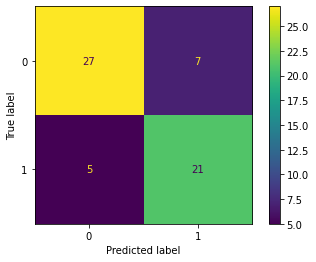

In [9]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred) ;

### **Zadanie 2**

Dla podanego poniżej zbioru opisującego grzyby należy proszę utworzyć drzewo decyzyjne za pomocą DecisionTreeClassifier:

* wszystkie atrybuty są kategoryczne, a więc należy dokonać ich tranformacji na numeryczne
* zbiór danych należy podzielić na treningowy i testowy w proporcji 80/20
* sprawdzić dla jakiej głębokości drzewa dokładność klasyfikacji jest najlepsza
* czy jakość i kształt drzewa zmienia się jeżeli kryterium podziału zmienimy z gini na entropy?


In [10]:
!wget https://datahub.io/machine-learning/mushroom/r/mushroom.csv

--2022-12-25 16:05:23--  https://datahub.io/machine-learning/mushroom/r/mushroom.csv
Resolving datahub.io (datahub.io)... 172.67.157.38, 104.21.40.221, 2606:4700:3033::6815:28dd, ...
Connecting to datahub.io (datahub.io)|172.67.157.38|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://pkgstore.datahub.io/machine-learning/mushroom/mushroom_csv/data/652524e2d0176fbc16354df92fe91fcd/mushroom_csv.csv [following]
--2022-12-25 16:05:24--  https://pkgstore.datahub.io/machine-learning/mushroom/mushroom_csv/data/652524e2d0176fbc16354df92fe91fcd/mushroom_csv.csv
Resolving pkgstore.datahub.io (pkgstore.datahub.io)... 104.21.40.221, 172.67.157.38, 2606:4700:3030::ac43:9d26, ...
Connecting to pkgstore.datahub.io (pkgstore.datahub.io)|104.21.40.221|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 379652 (371K) [text/csv]
Saving to: ‘mushroom.csv’

mushroom.csv        100%[===================>] 370.75K  --.-KB/s    in 0.05s   

2022-12-25 1

In [11]:
mushroom = pd.read_csv('mushroom.csv')

# Dla cechy stalk-root brakuje wartości, więc dla uproszczenia pominiemy ją
mushroom = mushroom.drop(['stalk-root'], axis=1)

# Podstawowe informacje na temat zbioru
mushroom.info()
mushroom.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   cap-shape                 8124 non-null   object
 1   cap-surface               8124 non-null   object
 2   cap-color                 8124 non-null   object
 3   bruises%3F                8124 non-null   object
 4   odor                      8124 non-null   object
 5   gill-attachment           8124 non-null   object
 6   gill-spacing              8124 non-null   object
 7   gill-size                 8124 non-null   object
 8   gill-color                8124 non-null   object
 9   stalk-shape               8124 non-null   object
 10  stalk-surface-above-ring  8124 non-null   object
 11  stalk-surface-below-ring  8124 non-null   object
 12  stalk-color-above-ring    8124 non-null   object
 13  stalk-color-below-ring    8124 non-null   object
 14  veil-type               

,cap-shape,cap-surface,cap-color,bruises%3F,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,x,s,n,t,p,f,c,n,k,e,...,w,w,p,w,o,p,k,s,u,p
1,x,s,y,t,a,f,c,b,k,e,...,w,w,p,w,o,p,n,n,g,e
2,b,s,w,t,l,f,c,b,n,e,...,w,w,p,w,o,p,n,n,m,e
3,x,y,w,t,p,f,c,n,n,e,...,w,w,p,w,o,p,k,s,u,p
4,x,s,g,f,n,f,w,b,k,t,...,w,w,p,w,o,e,n,a,g,e


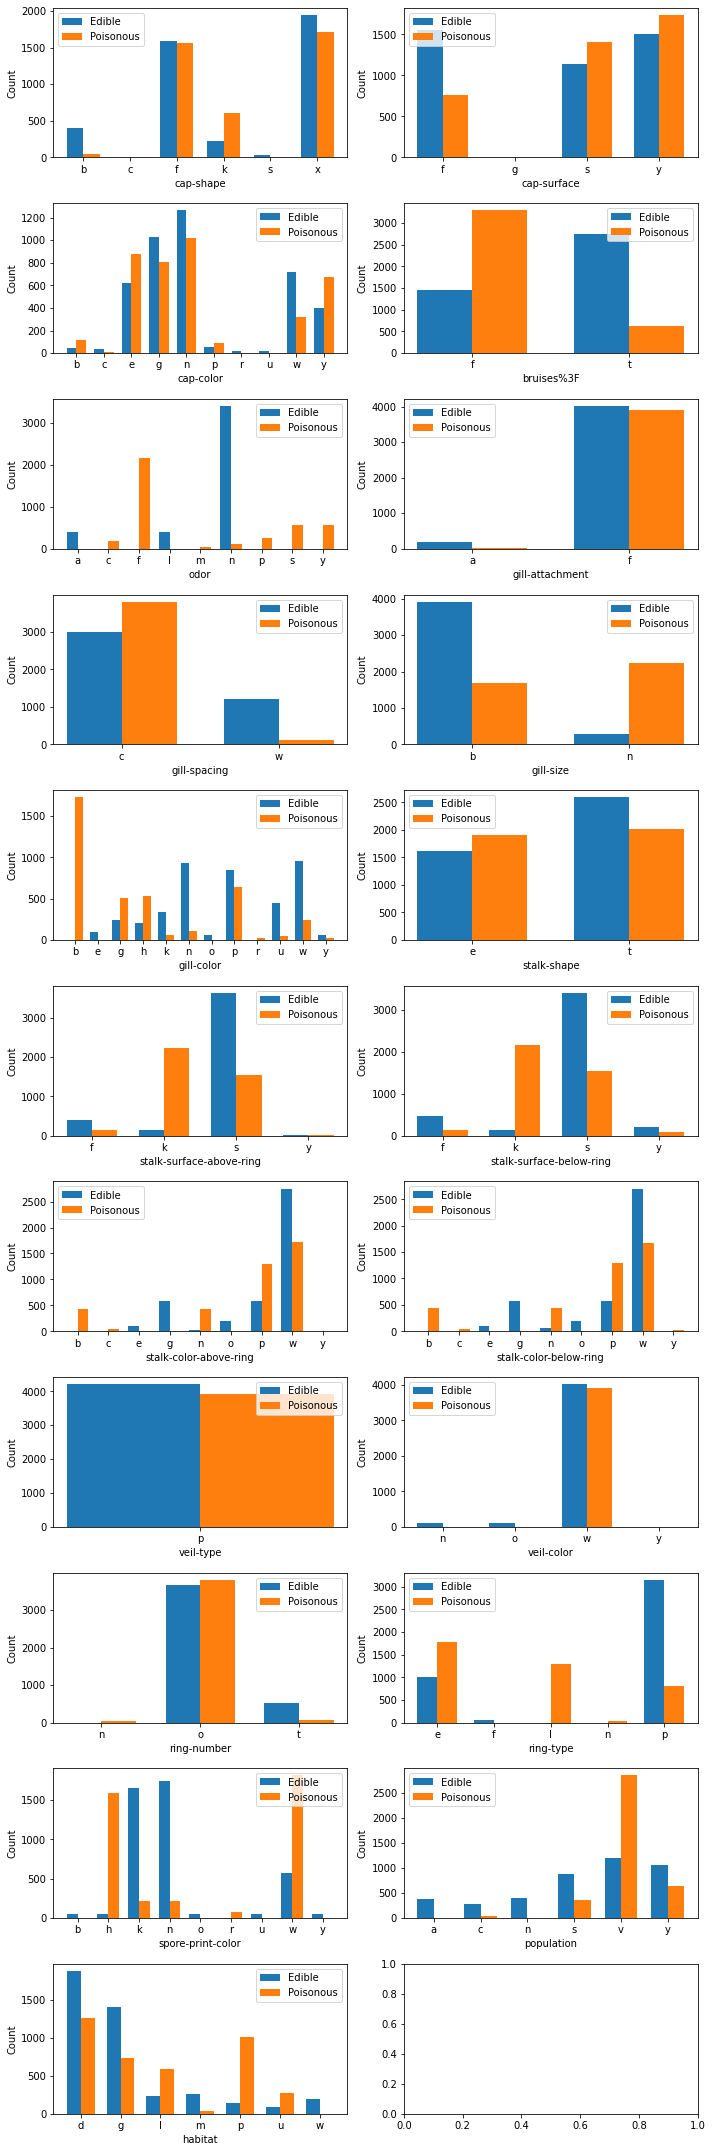

In [12]:
n = len(mushroom.columns) - 1
fig, axes = plt.subplots(ncols=2, nrows=int(np.ceil(n / 2)), figsize=(10, 30))

for fi, feature in enumerate(mushroom.columns[:-1]):
  column = mushroom[feature]
  labels = sorted(column.unique())
  label_to_pos = { l:i for i, l in enumerate(labels) }
  
  poison = mushroom[mushroom['class'] == 'p']
  edible = mushroom[mushroom['class'] == 'e']
  
  poison_values = [0] * len(labels)
  for label, count in zip(*np.unique(poison[feature], return_counts=True)):
    poison_values[label_to_pos[label]] = count
  
  edible_values = [0] * len(labels)
  for label, count in zip(*np.unique(edible[feature], return_counts=True)):
    edible_values[label_to_pos[label]] = count
  
  x = np.arange(len(labels))  # the label locations
  
  bar_width = 0.35
  
  # fig, ax = plt.subplots()
  ax = axes[fi // 2][fi % 2]
  ax.bar(x - bar_width/2, edible_values, bar_width, label='Edible')
  ax.bar(x + bar_width/2, poison_values, bar_width, label='Poisonous')
  
  # Add some text for labels, title and custom x-axis tick labels, etc.
  ax.set_ylabel('Count')
  ax.set_xlabel(feature)
  ax.set_xticks(x)
  ax.set_xticklabels(labels)
  ax.legend()

fig.tight_layout()

plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
msh = mushroom.copy()

# Obiekt umożliwiający kodowanie wartości 
labelencoder = LabelEncoder()

for column in msh.columns:
    enc = labelencoder.fit(msh[column])
    msh[column] = enc.transform(msh[column])  # przejście na wart. numeryczne
    # Dla celów informacyjnych:
    val = np.unique(msh[column])
    print(f'{column}:\t{val}\t{enc.inverse_transform(val)}')

X = msh.drop(['class'], axis=1)
y = msh['class']

cap-shape:	[0 1 2 3 4 5]	['b' 'c' 'f' 'k' 's' 'x']
cap-surface:	[0 1 2 3]	['f' 'g' 's' 'y']
cap-color:	[0 1 2 3 4 5 6 7 8 9]	['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises%3F:	[0 1]	['f' 't']
odor:	[0 1 2 3 4 5 6 7 8]	['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment:	[0 1]	['a' 'f']
gill-spacing:	[0 1]	['c' 'w']
gill-size:	[0 1]	['b' 'n']
gill-color:	[ 0  1  2  3  4  5  6  7  8  9 10 11]	['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape:	[0 1]	['e' 't']
stalk-surface-above-ring:	[0 1 2 3]	['f' 'k' 's' 'y']
stalk-surface-below-ring:	[0 1 2 3]	['f' 'k' 's' 'y']
stalk-color-above-ring:	[0 1 2 3 4 5 6 7 8]	['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring:	[0 1 2 3 4 5 6 7 8]	['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type:	[0]	['p']
veil-color:	[0 1 2 3]	['n' 'o' 'w' 'y']
ring-number:	[0 1 2]	['n' 'o' 't']
ring-type:	[0 1 2 3 4]	['e' 'f' 'l' 'n' 'p']
spore-print-color:	[0 1 2 3 4 5 6 7 8]	['b' 'h' 'k' 'n' 'o' 'r' 'u' 'w' 'y']
population:	[0 1 2 3 4 5]	['a' '

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)

f'Rozmiar zb. treningowego: {len(X_train)}, rozmiar zb. testowego: {len(X_test)}'

'Rozmiar zb. treningowego: 6499, rozmiar zb. testowego: 1625'

In [16]:
max_accuracy = -100
max_index = 0
for d in range(1, 10):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if (accuracy_score(y_test, y_pred) * 100)  > max_accuracy:
      max_accuracy = accuracy_score(y_test, y_pred) * 100
      max_index = d
    print(f'Dokładność klasyfikacji przy glębokości {d}: {accuracy_score(y_test, y_pred) * 100 : .1f}%')
print(f'Najwieksza dokładność klasyfikacji ({max_accuracy}%) jest przy glębokości {max_index}')

Dokładność klasyfikacji przy glębokości 1:  78.5%
Dokładność klasyfikacji przy glębokości 2:  90.8%
Dokładność klasyfikacji przy glębokości 3:  95.9%
Dokładność klasyfikacji przy glębokości 4:  97.7%
Dokładność klasyfikacji przy glębokości 5:  97.8%
Dokładność klasyfikacji przy glębokości 6:  99.8%
Dokładność klasyfikacji przy glębokości 7:  100.0%
Dokładność klasyfikacji przy glębokości 8:  100.0%
Dokładność klasyfikacji przy glębokości 9:  100.0%
Najwieksza dokładność klasyfikacji (100.0%) jest przy glębokości 7


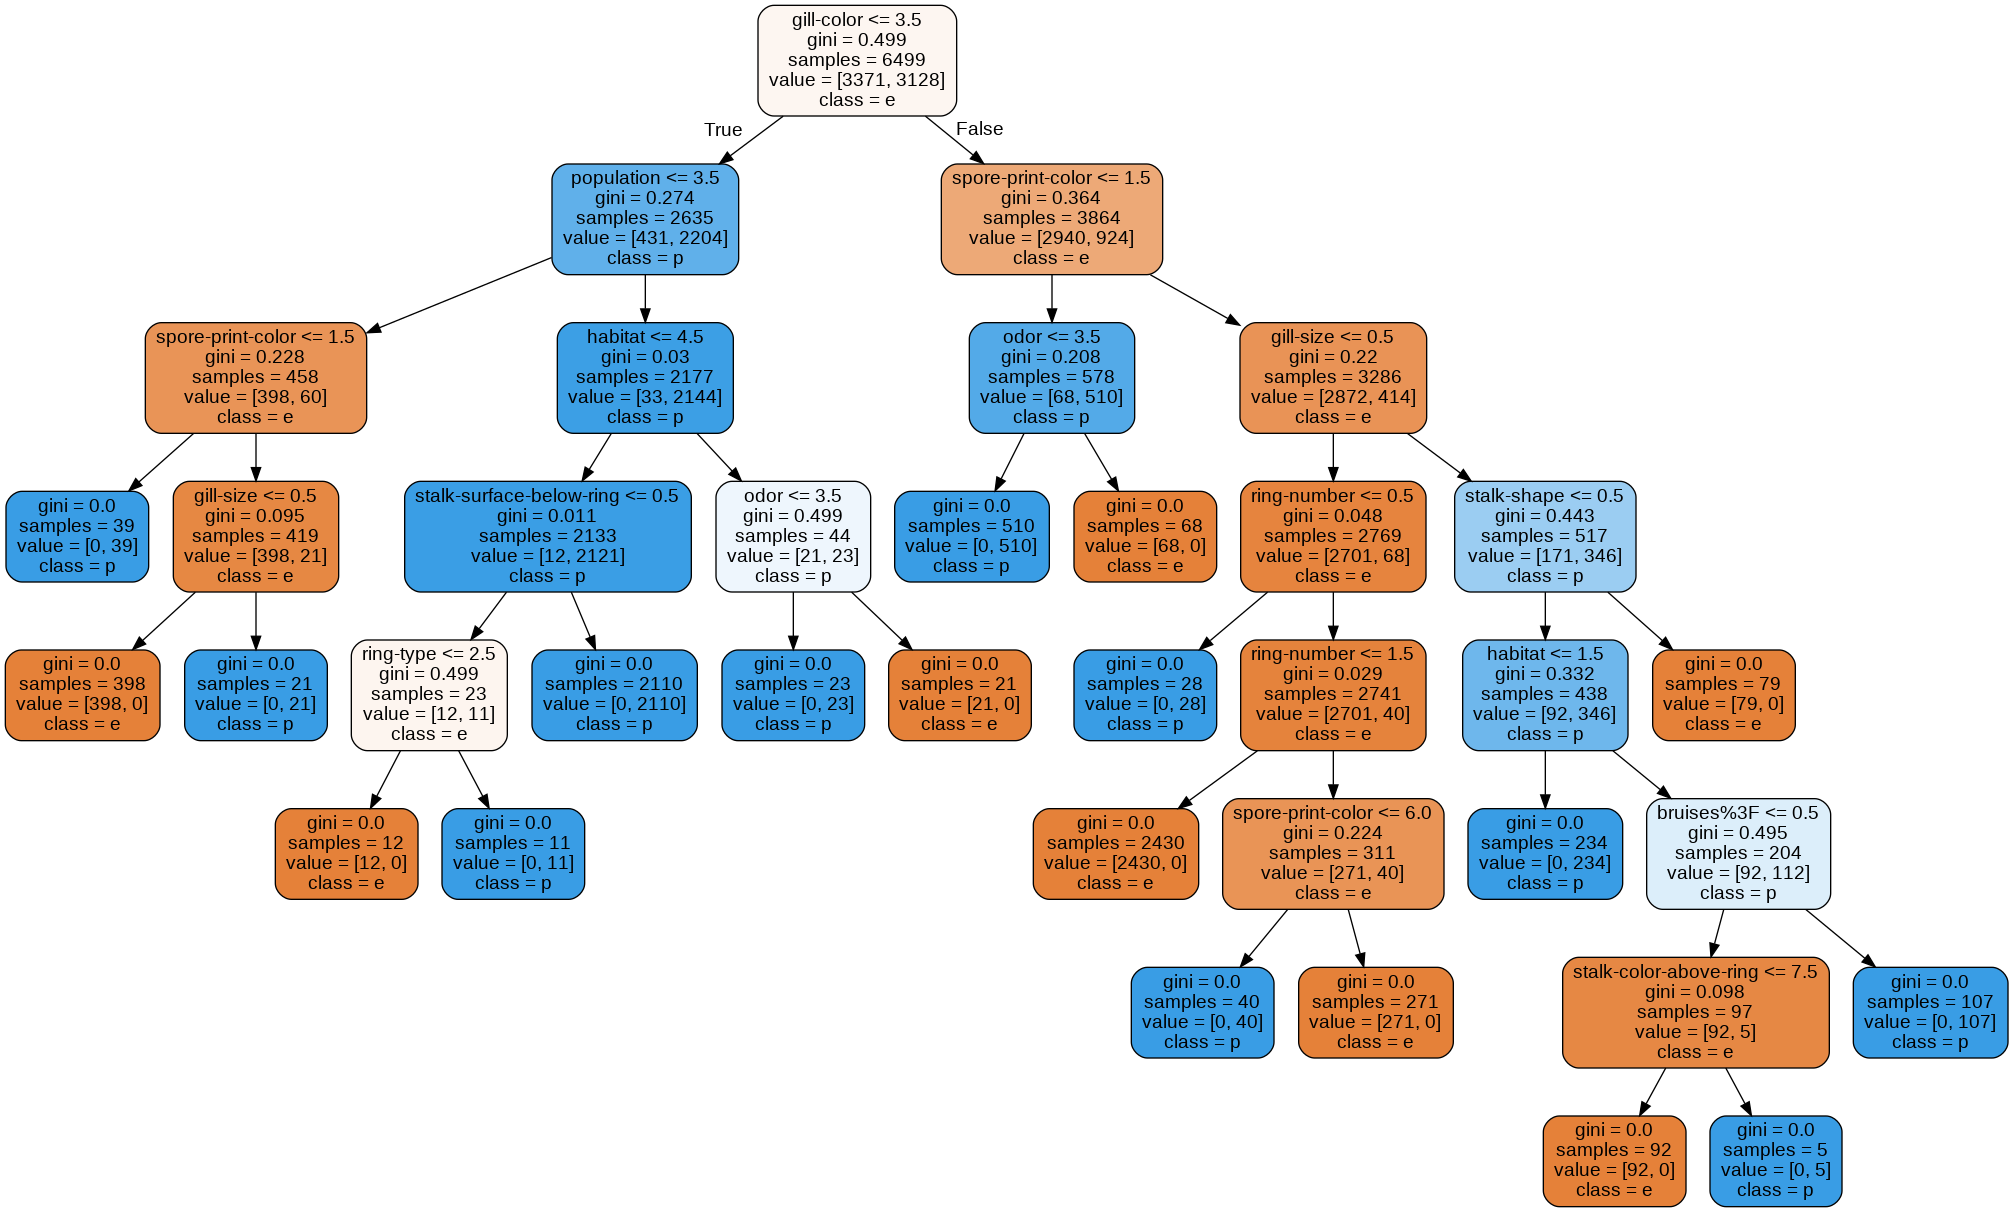

In [17]:
show_decision_tree(
    clf,
    feature_names=mushroom.columns[:-1],
    class_names=sorted(mushroom['class'].unique())
 )

In [18]:
clf = DecisionTreeClassifier(criterion='gini')
clf.fit(X, y);
y_pred = clf.predict(X_test)
print(f'Dokładność klasyfikacji: {accuracy_score(y_test, y_pred) * 100 : .1f}%')

Dokładność klasyfikacji:  100.0%


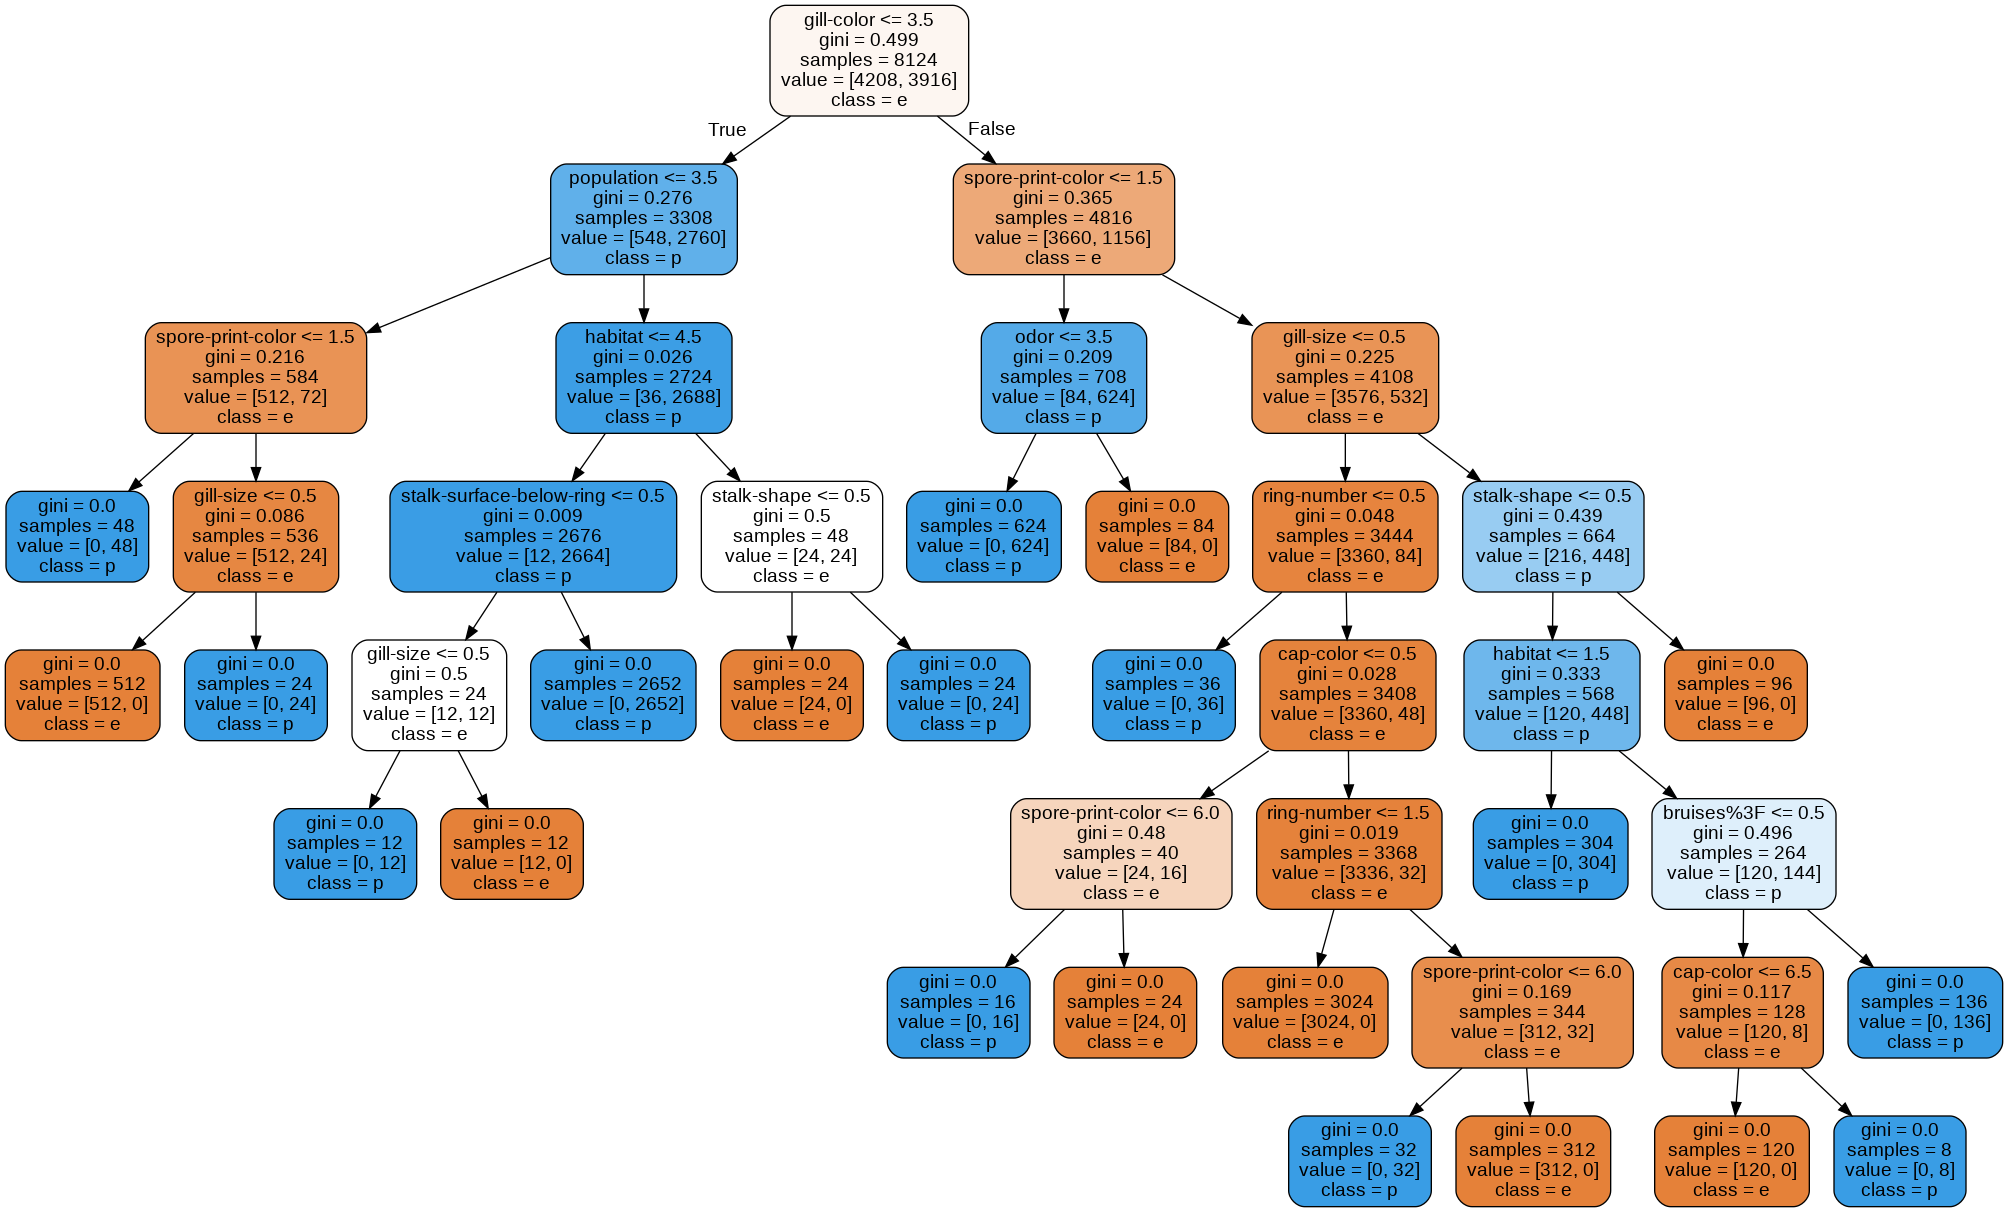

In [19]:
show_decision_tree(
    clf,
    feature_names=mushroom.columns[:-1],
    class_names=sorted(mushroom['class'].unique())
 )

In [21]:
clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X, y);
y_pred = clf.predict(X_test)
print(f'Dokładność klasyfikacji: {accuracy_score(y_test, y_pred) * 100 : .1f}%')

Dokładność klasyfikacji:  100.0%


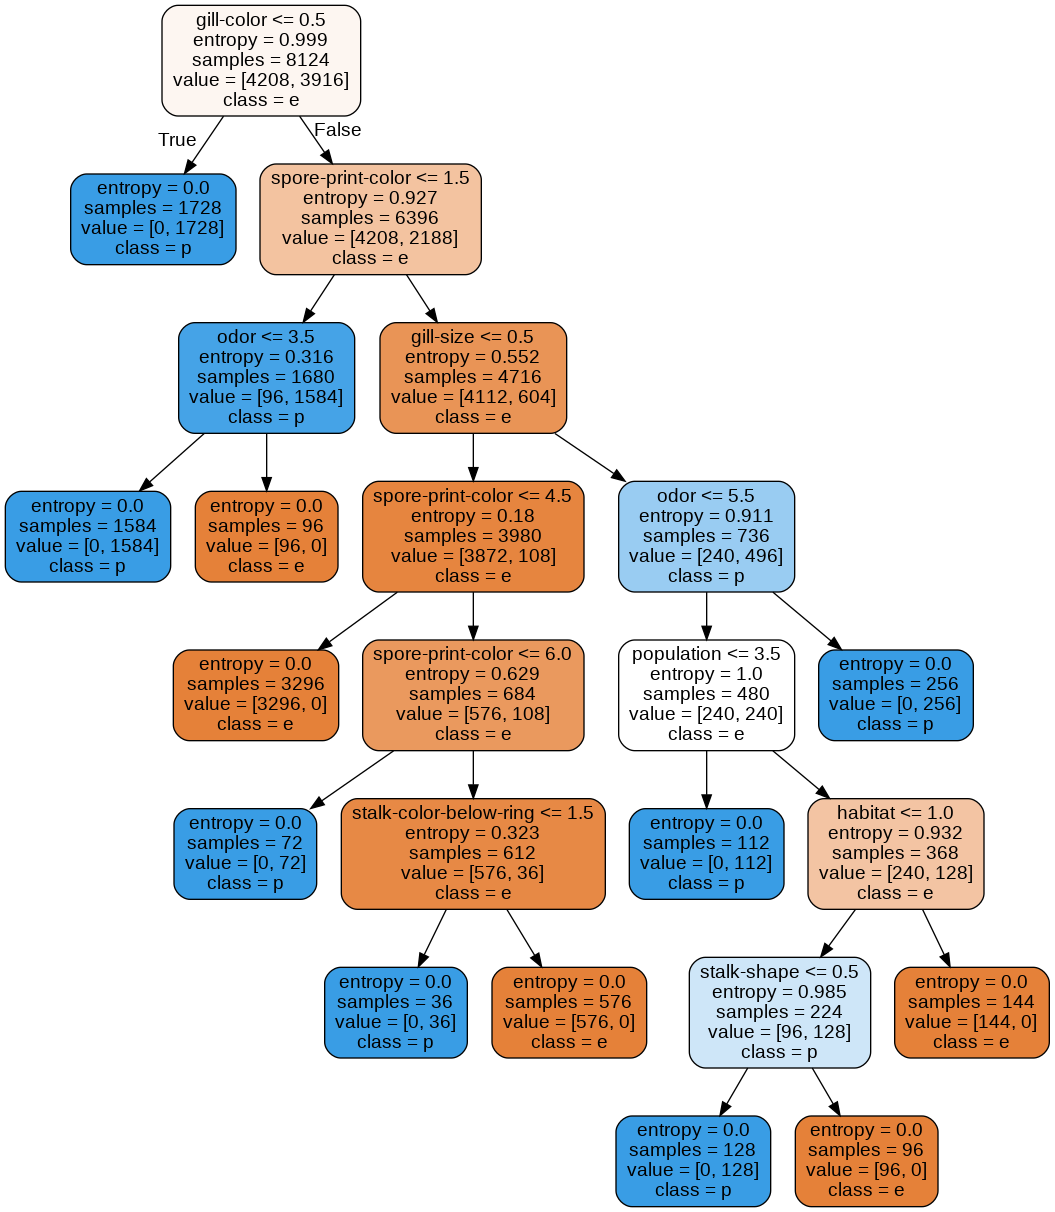

In [22]:
show_decision_tree(
    clf,
    feature_names=mushroom.columns[:-1],
    class_names=sorted(mushroom['class'].unique())
 )

### **Zadanie 3**

Dla zbioru danych heart dotyczących ryzyka zawału serca (atrybut target) utwórz klasyfikator drzewiasty:

*   dane podziel na zbiór treningowy i walidacyjny w proporcjach 75 / 25
*   dokonaj dostrajania hiperparametrów uwzględniając max_leaf_nodes, max_depth oraz criterion i być może inne (wg dokumentacji)

Czy skalowanie wartości atrybutów (ilościowych) ma istotne znaczenie dla budowy klasyfikatora drzewiastego?

In [23]:
!wget https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv

--2022-12-25 16:21:35--  https://raw.githubusercontent.com/sharmaroshan/Heart-UCI-Dataset/master/heart.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11328 (11K) [text/plain]
Saving to: ‘heart.csv’

heart.csv           100%[===================>]  11.06K  --.-KB/s    in 0s      

2022-12-25 16:21:35 (30.1 MB/s) - ‘heart.csv’ saved [11328/11328]



In [25]:
heart = pd.read_csv('heart.csv')

heart = heart.dropna()

heart.info()
heart.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.5 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [38]:
X = heart.drop(['target'], axis=1)
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12345)

f'Rozmiar zb. treningowego: {len(X_train)}, rozmiar zb. testowego: {len(X_test)}'

'Rozmiar zb. treningowego: 227, rozmiar zb. testowego: 76'

In [39]:
max_accuracy = -100
max_index = 0
for d in range(1, 10):
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    if (accuracy_score(y_test, y_pred) * 100)  > max_accuracy:
      max_accuracy = accuracy_score(y_test, y_pred) * 100
      max_index = d
    print(f'Dokładność klasyfikacji przy glębokości {d}: {accuracy_score(y_test, y_pred) * 100 : .1f}%')
print(f'Najwieksza dokładność klasyfikacji ({max_accuracy}%) jest przy glębokości {max_index}')

Dokładność klasyfikacji przy glębokości 1:  72.4%
Dokładność klasyfikacji przy glębokości 2:  75.0%
Dokładność klasyfikacji przy glębokości 3:  78.9%
Dokładność klasyfikacji przy glębokości 4:  72.4%
Dokładność klasyfikacji przy glębokości 5:  73.7%
Dokładność klasyfikacji przy glębokości 6:  75.0%
Dokładność klasyfikacji przy glębokości 7:  71.1%
Dokładność klasyfikacji przy glębokości 8:  72.4%
Dokładność klasyfikacji przy glębokości 9:  73.7%
Najwieksza dokładność klasyfikacji (78.94736842105263%) jest przy glębokości 3


In [41]:
# Wartości parametrów, które będziemy uwzględniać
params = {
    'max_depth' : [2, 3, 4, 5, 6, 8, 10],
    'criterion' : ["gini", "entropy"],
    'min_samples_split' : [2,4,6,8,10],
}

clf  = DecisionTreeClassifier()

grid = RandomizedSearchCV(clf, params, n_jobs=-1)
grid.fit(X_train, y_train)

print(f'Best params: {grid.best_params_}')

clf.set_params(**grid.best_params_)
clf.fit(X_train, y_train)

print(f'Dokładność: {clf.score(X_test, y_test)}')

Best params: {'min_samples_split': 8, 'max_depth': 3, 'criterion': 'entropy'}
Dokładność: 0.7894736842105263
